# Biodiversity in National Parks
##### Created by Gavin Whelan
## Introduction
This project is the culmination of my participation in the Data Science/Visualization portion of the Codecademy Data Science for Natural Language Processing course. It will use data provided by Codecademy.com, which is mostly fictional. 

DATA SOURCES: There are two data sources provided, observations.csv and species_info.csv

## Scoping
Here, I'll outline the scope of this project.

### Project Goals
The research questions I'd like to delve into. I'll revisit these in the Conclusion, and decide the extent to which I was able to answer them. I will focus mostly on species endangerment, since this is vital to conservation efforts.
- How can we describe the distribution of species' endangerment? 
- How are endangered species threatened based on where they are located? Can we say anything about how certain climates affect species status?
- How have species been affected over time?
- Are different types of species endangered more than others?

### Data
As stated in the Introduction, I wwill be using the provided Observations.csv and Species_info.csv. Observations.csv contains observations of particular animals, annd Species_info.csv contains information about different species and where they are found.

### Analysis
I will begin by getting a sense of the data, then move on to more thorough investigations, as outlined below:
- Examine the distributions of different species within parks
- Look for correlations between location and conservation status

I will also use statistical inference to determine whether findings are statistically significant.

### Evaluation
In this section I'll revisit the research questions outlined in the Project Goals, anmd determine the extent to which I've been able to answer them.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Data

In [2]:
observations = pd.read_csv('observations.csv')
species_info = pd.read_csv('species_info.csv')

In [3]:
print(observations.head(5))

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


In [4]:
print(species_info.head(5))

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


In [5]:
# It's been a hot sec since I've worked on Python so just testing out that this worked.
# Also I thought the scientific name of thes species was 'NeovisIon visIon' which would have been sick.
print(species_info.common_names[species_info.scientific_name == 'Neovison vison'])

4455    American Mink
Name: common_names, dtype: object


In [6]:
print(observations.dtypes)
print("")
print(species_info.dtypes)

scientific_name    object
park_name          object
observations        int64
dtype: object

category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object


In [7]:
print(observations.value_counts())

scientific_name                      park_name                            observations
Poa compressa                        Great Smoky Mountains National Park  80              2
Salix exigua                         Yosemite National Park               186             2
Eleocharis palustris                 Great Smoky Mountains National Park  62              2
Potentilla norvegica                 Yosemite National Park               148             2
Spilogale putorius                   Yellowstone National Park            256             2
                                                                                         ..
Entodon sullivantii                  Yosemite National Park               165             1
                                     Yellowstone National Park            237             1
                                     Great Smoky Mountains National Park  64              1
                                     Bryce National Park                  85         

In [8]:
print(species_info.value_counts())

category        scientific_name         common_names                                       conservation_status
Amphibian       Anaxyrus canorus        Yosemite Toad                                      Threatened             1
Mammal          Sylvilagus bachmani     Brush Rabbit                                       Species of Concern     1
                Myotis lucifugus        Little Brown Myotis                                Species of Concern     1
                Myotis septentrionalis  Northern Long-Eared Bat, Northern Myotis           Threatened             1
                Myotis sodalis          Indiana Bat, Indiana Or Social Myotis              Endangered             1
                                                                                                                 ..
Bird            Pipilo chlorurus        Green-Tailed Towhee                                Species of Concern     1
                Piranga rubra           Summer Tanager                       

In [9]:
# It looks like there are some duplicate rows in observations--let's remedy that.

#observations_new = observations.drop_duplicates().reset_index()
#We'll use observations_new from now on

# WE CAN'T DO THIS! There are multiple listings for each species and park combination, so it just
# happens that there are duplicates, and we can't assume they're erroneous.

### Exploration
Getting a sense of what the data looks like. I want to figure out the distributions of different variables.

In [10]:
# How many entries are there for each park?

print(observations.park_name.value_counts())

Great Smoky Mountains National Park    5824
Yosemite National Park                 5824
Bryce National Park                    5824
Yellowstone National Park              5824
Name: park_name, dtype: int64


In [11]:
print(observations.scientific_name.nunique())

5541


Looks like there are 5541 different species!

In [12]:
print(observations.observations.sum())

3314739


And there are 3,314,739 separate observations. That's a lot of observations.

In [13]:
# I noticed that certain species showed up with 12 different observation values, and this is what I got.
# Looks like there's multiple entries for EACH PARK for EACH SPECIES.

print(observations[observations.scientific_name == 'Castor canadensis'])

         scientific_name                            park_name  observations
951    Castor canadensis  Great Smoky Mountains National Park            95
3792   Castor canadensis  Great Smoky Mountains National Park            62
6186   Castor canadensis            Yellowstone National Park           183
6303   Castor canadensis                  Bryce National Park            70
9811   Castor canadensis            Yellowstone National Park           256
10282  Castor canadensis               Yosemite National Park           149
13025  Castor canadensis            Yellowstone National Park           264
13825  Castor canadensis                  Bryce National Park           105
14391  Castor canadensis               Yosemite National Park           191
16654  Castor canadensis                  Bryce National Park           103
19563  Castor canadensis  Great Smoky Mountains National Park            86
19997  Castor canadensis               Yosemite National Park           161


In [14]:
# How many observations are there of each species?

# This didn't do what I wanted before. I want a dataframe that has an index of species name
# and a column containing how many times that species has been seen in ANY park.

observations_by_species = observations.groupby('scientific_name')['observations'].sum()

print(observations_by_species)

scientific_name
Abies bifolia                          532
Abies concolor                         630
Abies fraseri                          518
Abietinella abietina                   592
Abronia ammophila                      523
                                      ... 
Zonotrichia leucophrys gambelii        560
Zonotrichia leucophrys oriantha        558
Zonotrichia querula                    616
Zygodon viridissimus                   600
Zygodon viridissimus var. rupestris    651
Name: observations, Length: 5541, dtype: int64


In [15]:
# In looking back over this project, I noticed that there were a lot of species with Null
# values for conservation status. Turns out I was right. Let's take a closer look at that.

print(species_info.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None


In [16]:
print(f"na entries: {species_info.conservation_status.isna().sum()}" )

print(species_info.conservation_status.value_counts())

na entries: 5633
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64


So there are 5633 species of no concern, 161 species of concern, 16 endangered species, and 4 species in recovery

In [17]:
print(species_info.category.unique())

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [18]:
print(species_info.category.value_counts())

Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: category, dtype: int64


#### Note:
So we see that the options are "Species of Concern", "Endangered", "Threatened", and "In Recovery". Given the ubiquity of the species list, I would guess that each species with a null value is not in danger. We will keep that assumption moving forward.

In [19]:
# Let's make a list of just the species in trouble.

species_trouble = species_info.dropna(subset = ['conservation_status']).reset_index()

In [20]:
print(species_trouble.head())

   index category            scientific_name       common_names  \
0      7   Mammal              Canis latrans             Coyote   
1      8   Mammal                Canis lupus          Gray Wolf   
2      9   Mammal                Canis rufus           Red Wolf   
3     29   Mammal           Eptesicus fuscus      Big Brown Bat   
4     30   Mammal  Lasionycteris noctivagans  Silver-Haired Bat   

  conservation_status  
0  Species of Concern  
1          Endangered  
2          Endangered  
3  Species of Concern  
4  Species of Concern  


### Analysis

In [21]:
# Taking our cue from the sample project, let's change the Null values from the conservation_status
#   column of species_info and relabel it as "No Intervention"

species_info.fillna('No Intervention', inplace=True)
species_info.groupby('conservation_status').size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

In [22]:
conservationCategory = species_info[species_info.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count().unstack()

print(conservationCategory)

category             Amphibian  Bird  Fish  Mammal  Nonvascular Plant  \
conservation_status                                                     
Endangered                 1.0   4.0   3.0     7.0                NaN   
In Recovery                NaN   3.0   NaN     1.0                NaN   
Species of Concern         4.0  72.0   4.0    28.0                5.0   
Threatened                 2.0   NaN   4.0     2.0                NaN   

category             Reptile  Vascular Plant  
conservation_status                           
Endangered               NaN             1.0  
In Recovery              NaN             NaN  
Species of Concern       5.0            43.0  
Threatened               NaN             2.0  


Text(0, 0.5, 'Number of Species')

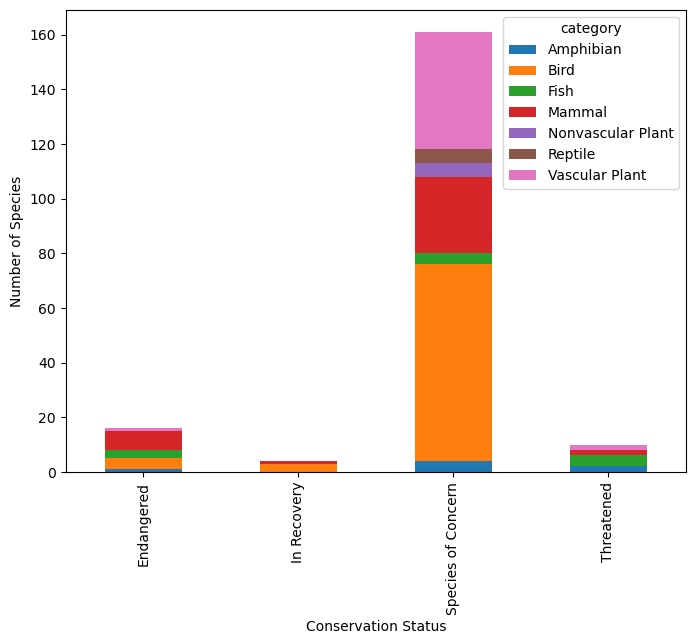

In [23]:
ax = conservationCategory.plot(kind = 'bar', figsize=(8,6), stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species")

#### Observations by park
Now we'll take a look and see which parks have the most observations in them.

In [24]:
parkObservations = observations.groupby(["park_name", "scientific_name"])["observations"].sum()

print(parkObservations)

park_name               scientific_name                    
Bryce National Park     Abies bifolia                          109
                        Abies concolor                          83
                        Abies fraseri                          109
                        Abietinella abietina                   101
                        Abronia ammophila                       92
                                                              ... 
Yosemite National Park  Zonotrichia leucophrys gambelii        169
                        Zonotrichia leucophrys oriantha        135
                        Zonotrichia querula                    160
                        Zygodon viridissimus                   159
                        Zygodon viridissimus var. rupestris    210
Name: observations, Length: 22164, dtype: int64


That printed by park and by species, but that's pretty hard to read. This might be useful later if we want to group by animal type, but for now I'm going to take out the part about the scientific name.

In [25]:
# Create a new Series called parkObservations, grouping by park name and setting the values to the
#   sum of all observations
parkObservations = observations.groupby(["park_name"])["observations"].sum()

print(parkObservations)

park_name
Bryce National Park                     576025
Great Smoky Mountains National Park     431820
Yellowstone National Park              1443562
Yosemite National Park                  863332
Name: observations, dtype: int64


In [26]:
new_indices = [park.rstrip(" National Park") for park in parkObservations.index]

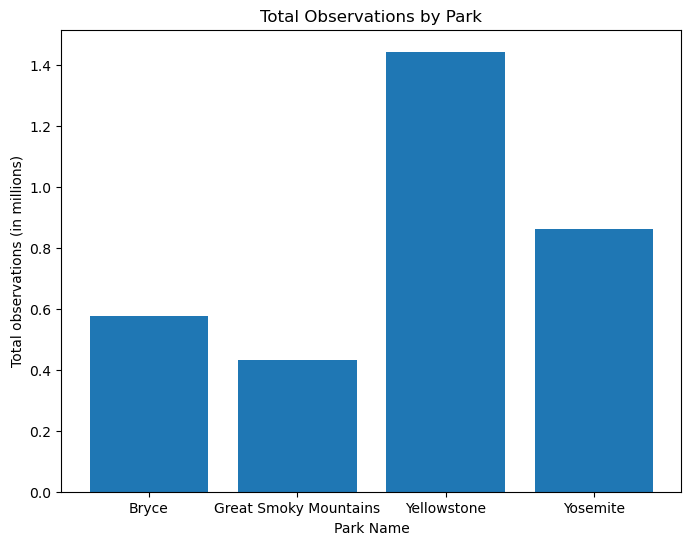

<Figure size 640x480 with 0 Axes>

In [27]:
# Adjust the size of the figure
plt.figure(figsize=(8,6))

# Set the axis labels and the title of the figure
plt.xlabel("Park Name")
plt.ylabel("Total observations (in millions)")
plt.xticks(range(len(new_indices)), new_indices)

plt.title("Total Observations by Park")

# Import the data from the parkObservations Series
plt.bar(parkObservations.index, parkObservations.values / 1000000.0)

# Show the graph
plt.show()

# Close the graph
plt.clf()

So it looks like there's more observations in Yellowstone by a large margin. I wonder why this is--are there more animals in Yellowstone, or is there just more infrastructure for recording observations?

#### Endangered Species by Park
I want to meld the two dataframes, so I can really dig into how many species are at each endangerment level in each park. My goal is something like the bar graph of total observations, but with the number in each endangerment category stacked.

First, we need to get the right dataframe. We need the park_name, the conservation_status, and the observations, grouped by park_name and conservation_status.

In [28]:
# Strip out all the species that aren't endangered--it makes the data hard to read, and we'll express
#   the quantities of endangered sightings in terms of percentages of total sightings, so no data
#   will be lost.
species_info_endangered = species_info[species_info.conservation_status != "No Intervention"]

# Merge observations and species_info_endangered on scientific_name
observations_merged = pd.merge(observations, species_info_endangered, on="scientific_name")

# Rename the columns
observations_merged = observations_merged.rename(columns={"observations_x": "observations",\
                                                          "observations_y": "observations_total"})

observations_endangered = observations_merged.groupby(["park_name", "conservation_status"])\
    ["observations"].sum().unstack()

observations_endangered_merged = pd.merge(observations_endangered,\
                                           parkObservations.to_frame(),\
                                           left_on = "park_name",\
                                           right_index=True)

print(observations_endangered_merged)

                                     Endangered  In Recovery  \
park_name                                                      
Bryce National Park                         619          388   
Great Smoky Mountains National Park         393          248   
Yellowstone National Park                  1558          889   
Yosemite National Park                      943          582   

                                     Species of Concern  Threatened  \
park_name                                                             
Bryce National Park                               17011         591   
Great Smoky Mountains National Park               11735         440   
Yellowstone National Park                         40677        1459   
Yosemite National Park                            24539         849   

                                     observations  
park_name                                          
Bryce National Park                        576025  
Great Smoky Mountains National P

In [47]:
# Make a list of the unique conservation statuses other than "No Intervention" (just a bucket for the
#   labels)
cstats = species_info["conservation_status"].unique()
conservation_statuses = cstats[cstats != "No Intervention"]

print(conservation_statuses)

observ_endan_percent = observations_endangered_merged[conservation_statuses]\
                        .div(observations_endangered_merged['observations'], axis=0) * 100

print(observ_endan_percent)

['Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
                                     Species of Concern  Endangered  \
park_name                                                             
Bryce National Park                            2.953170    0.107461   
Great Smoky Mountains National Park            2.717568    0.091010   
Yellowstone National Park                      2.817821    0.107927   
Yosemite National Park                         2.842360    0.109228   

                                     Threatened  In Recovery  
park_name                                                     
Bryce National Park                    0.102600     0.067358  
Great Smoky Mountains National Park    0.101894     0.057431  
Yellowstone National Park              0.101069     0.061584  
Yosemite National Park                 0.098340     0.067413  


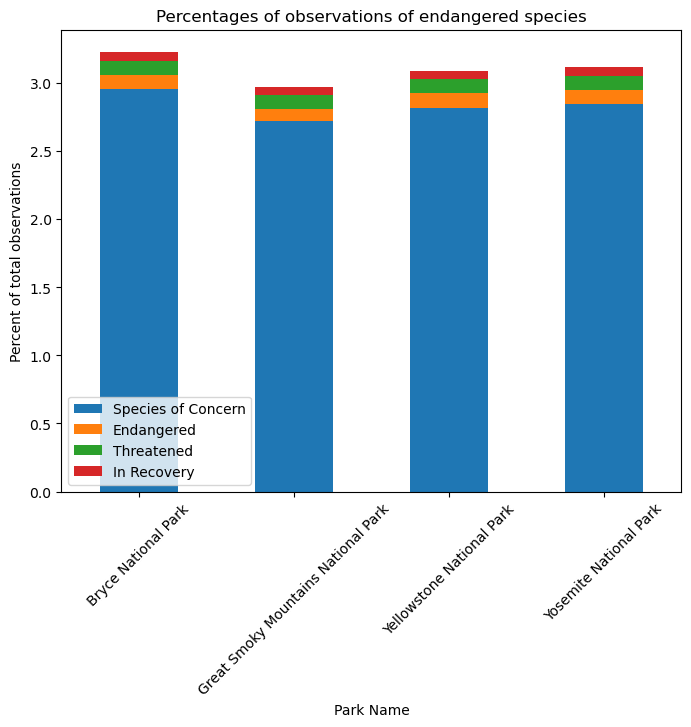

<Figure size 640x480 with 0 Axes>

In [51]:
ax2 = observ_endan_percent.plot(kind = 'bar', figsize=(8,6), stacked=True)
ax2.set_xlabel("Park Name")
ax2.set_ylabel("Percent of total observations")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
plt.title("Percentages of observations of endangered species")
plt.show()
plt.clf()

We see here that the percentages are roughly the same, potentially slightly more in Bryce National Park than in the rest, with the fewest being in Great Smoky Mountains National Park. My gut feeling is that this is just up to error, but I will have to think about how to test that.

#### Statistical Significance
I'll run some chi squared tests here to see if different parks have statistically significant differences in conservation status rates. 

We'll use a p-value of 0.05, in accordance with common practice.

First, we'll compare Bryce and Great Smoky Mountains.

In [33]:
from scipy.stats import chi2_contingency

oem = pd.DataFrame()

oem = observations_endangered_merged.copy()

oem["protected"] = observations_endangered_merged[conservation_statuses].sum(axis=1)
oem["not_protected"] = observations_endangered_merged['observations']\
                        - oem['protected']

oem.drop(columns=np.append(conservation_statuses, "observations"), inplace=True)

print(oem)

                                     protected  not_protected
park_name                                                    
Bryce National Park                      18609         557416
Great Smoky Mountains National Park      12816         419004
Yellowstone National Park                44583        1398979
Yosemite National Park                   26913         836419


In [41]:
park_1 = "Bryce National Park"
park_2 = "Great Smoky Mountains National Park"

values_park_1 = oem.loc[park_1, ["protected", "not_protected"]].values
values_park_2 = oem.loc[park_2, ["protected", "not_protected"]].values

contingency1 = [values_park_1,\
                values_park_2]

chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=56.28963856308099, pvalue=6.254414982002641e-14, dof=1, expected_freq=array([[ 17960.68405856, 558064.31594144],
       [ 13464.31594144, 418355.68405856]]))

Here we have a p-value of 6.25e-14, which is miniscule compared to the standard p=0.05. Hence, we can say that Bryce is shown to have a statistically significant higher rate of observed endangered species.

In [42]:
park_1 = "Yellowstone National Park"
park_2 = "Yosemite National Park"

values_park_1 = oem.loc[park_1, ["protected", "not_protected"]].values
values_park_2 = oem.loc[park_2, ["protected", "not_protected"]].values

contingency1 = [values_park_1,\
                values_park_2]

chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=1.4968414290722887, pvalue=0.2211579999630593, dof=1, expected_freq=array([[  44739.33728728, 1398822.66271272],
       [  26756.66271272,  836575.33728728]]))

Here, however, the p-value is 0.22, which is higher than the standard p=0.05. We can say that the number of species observed as endangered between these two parks is statistically insignificant.

In [44]:
park_1 = "Bryce National Park"
park_2 = "Yosemite National Park"

values_park_1 = oem.loc[park_1, ["protected", "not_protected"]].values
values_park_2 = oem.loc[park_2, ["protected", "not_protected"]].values

contingency1 = [values_park_1,\
                values_park_2]

chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=14.431357055582026, pvalue=0.0001453616457014566, dof=1, expected_freq=array([[ 18217.72503278, 557807.27496722],
       [ 27304.27496722, 836027.72503278]]))

Finally, comparing Bryce and Yosemite, we see that there is a p-value of 0.00015, which is still much smaller than the standard p=0.05. Thus, there is a significant difference here as well. It turns out I was wrong, and the trends in the graph "Percentages of Observations of Differrent Species" are statistically significant after all.

## Conclusions
I was able to make several data visualizations in this project, and compare the different parks to each other in terms of species endangerment. I was able to answer some of the original research questions:
- How can we describe the distribution of species' endangerment? 
    - Many more species are not endangered than endangered (~3% are endangered in any given park).
    - Among endangered species, a vast majority are Species of Concern, and many fewer are in another category.
- How are endangered species threatened based on where they are located?
    - There are significantly more endangered species in Bryce National Park than in any other park, and significantly fewer in Great Smoky Mountains National Park than any other park. 

## Further Research
I was unable to answer my third question, "How have species been affected over time?", because the period of data collection was only 7 days for this data set. Additionally, I decided not to pursue the question about how different types of species are endangered. That would be a topic for further research, but I decided it would be beyond the scope of this project, seeing as the endangerment in different parrks yielded interesting results and ended up being more complicated than I expected.

Further research could involve analysis of why Bryce exhibits so many more endangered species sightings than any other park. Is Bryce's region more impacted by climate change or hunting policies/practices than other parks? Similarly, why is Great Smoky National Park relatively low on endangered species? Are these species not native to the region, or have more of these endangered species died out, meaning Bryce would actually be the safer place for these endangered species? This would involve looking into the history of the parks and the typical habitats of the endangered species.